In [5]:
import pandas as pd
import os

def get_absolute_path(relative_path):
    # Convert relative path to absolute path
    absolute_path = os.path.abspath(relative_path)
    return absolute_path

In [6]:
# Load the dataset
stations_final = pd.read_csv('../data/processed/groupby/stations_final.csv')
# Add post_code column to the dataset based on station_id
stations_final['post_code'] = stations_final['post_code'].astype('category')

/var/folders/b_/j13k5nq9673_y1f35zsdbfk80000gn/T/ipykernel_48267/4197224161.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stations_final_grouped = stations_final.groupby('post_code').agg({


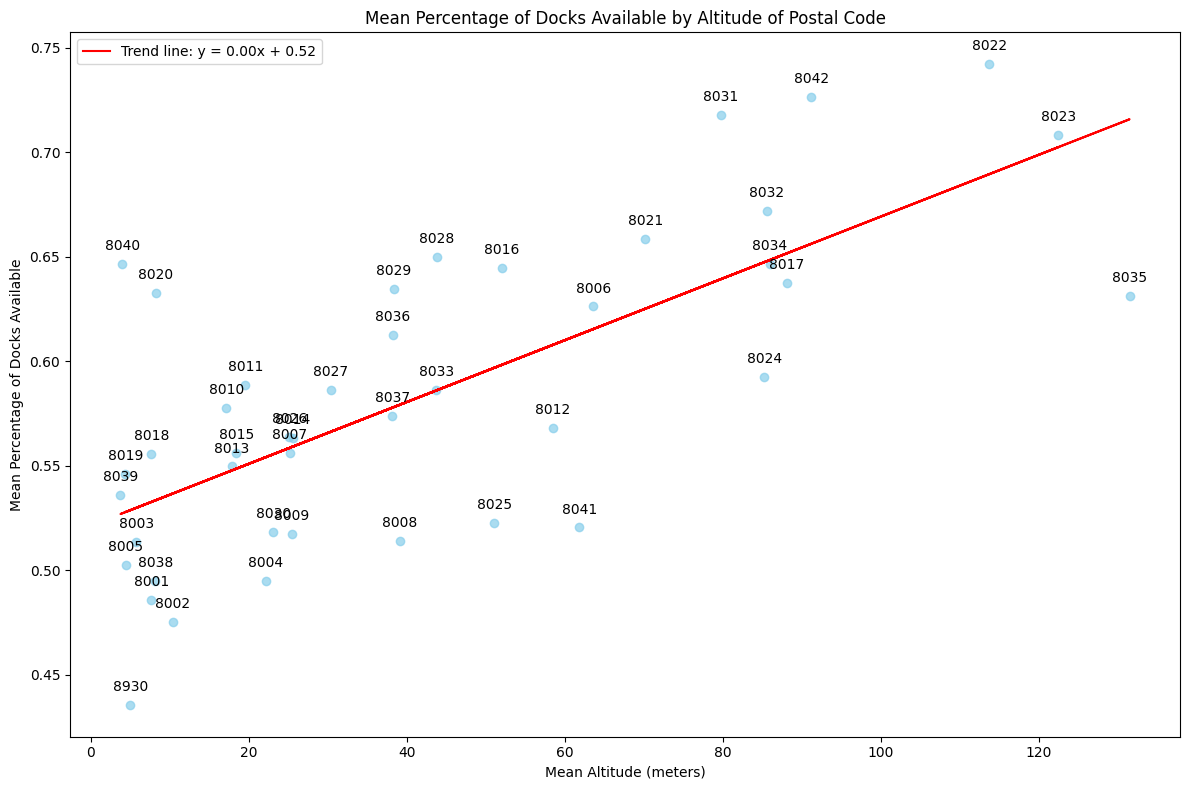

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'stations_final' is already loaded and contains the necessary columns
stations_final_grouped = stations_final.groupby('post_code').agg({
    'percentage_docks_available': 'mean',  # Calculate mean percentage of docks available
    'altitude': 'mean'  # Calculate mean altitude for each postal code
}).reset_index()
stations_final_grouped['post_code'] = stations_final_grouped['post_code'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size to fit your specific needs

# Create scatter plot
plt.scatter(stations_final_grouped['altitude'], stations_final_grouped['percentage_docks_available'], color='skyblue', alpha=0.7)

# Fit and plot a linear regression line
slope, intercept = np.polyfit(stations_final_grouped['altitude'], stations_final_grouped['percentage_docks_available'], 1)
plt.plot(stations_final_grouped['altitude'], slope * stations_final_grouped['altitude'] + intercept, color='red', label=f'Trend line: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('Mean Altitude (meters)')  # Label for the x-axis
plt.ylabel('Mean Percentage of Docks Available')  # Label for the y-axis
plt.title('Mean Percentage of Docks Available by Altitude of Postal Code')  # Title of the plot

# Enhancing the plot with a legend
plt.legend()

# Enhancing the plot with annotations
for i, txt in enumerate(stations_final_grouped['post_code']):
    plt.annotate(txt, (stations_final_grouped['altitude'][i], stations_final_grouped['percentage_docks_available'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

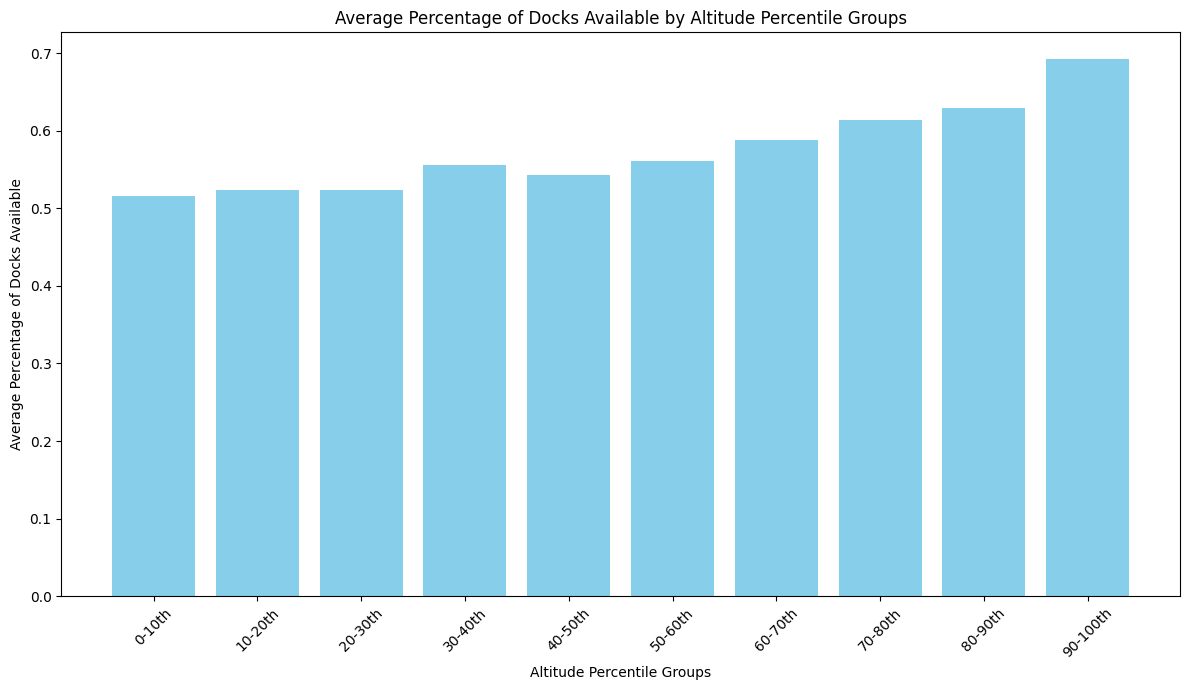

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'stations_final' is already loaded and contains the 'altitude' and 'percentage_docks_available' columns
# Calculate the percentile groups for altitude
stations_final['altitude_percentile'] = pd.qcut(stations_final['altitude'], q=10, labels=False)  # Divide altitude into deciles

# Group by the new 'altitude_percentile' column and calculate the mean of 'percentage_docks_available'
stations_final_grouped = stations_final.groupby('altitude_percentile')['percentage_docks_available'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 7))  # Adjust the size to fit your specific needs
# Create a numeric range for the x-axis positions
x_pos = range(len(stations_final_grouped['altitude_percentile']))

# Plot using numeric x positions
plt.bar(x_pos, stations_final_grouped['percentage_docks_available'], color='skyblue')
plt.xlabel('Altitude Percentile Groups')  # Correct Label for the x-axis
plt.ylabel('Average Percentage of Docks Available')  # Correct Label for the y-axis
plt.title('Average Percentage of Docks Available by Altitude Percentile Groups')  # Correct Title of the plot

# Set x-ticks to be the altitude percentile groups from the DataFrame
plt.xticks(x_pos, [f'{i*10}-{(i+1)*10}th' for i in range(10)], rotation=45)  # Labels represent each decile

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

# El codigo postal puede llegar a ser mas importante que la hora. Ya que el historico de hs no muestra mucha variacion. 

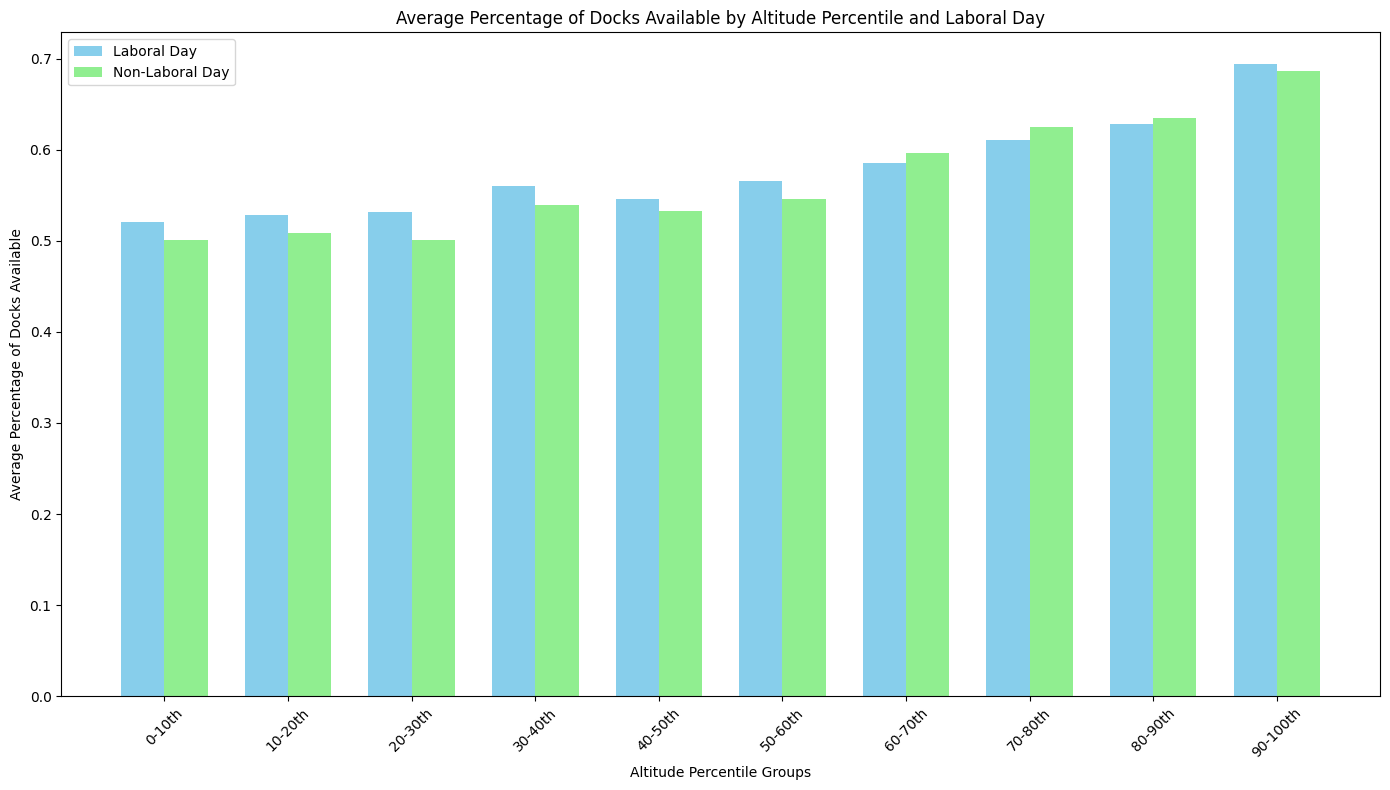

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'stations_final' is already loaded and contains the 'altitude', 'percentage_docks_available', and 'laboral_day' columns
# Calculate the percentile groups for altitude
stations_final['altitude_percentile'] = pd.qcut(stations_final['altitude'], q=10, labels=False)  # Divide altitude into deciles

# Group by both 'altitude_percentile' and 'laboral_day', and calculate the mean of 'percentage_docks_available'
stations_final_grouped = stations_final.groupby(['altitude_percentile', 'laboral_day'])['percentage_docks_available'].mean().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the size to fit your specific needs

# Width of the bars in the bar plot
width = 0.35

# Create a numeric range for the x-axis positions
x_pos = np.arange(len(stations_final_grouped))

# Plot using numeric x positions for true and false 'laboral_day'
rects1 = ax.bar(x_pos - width/2, stations_final_grouped[True], width, label='Laboral Day', color='skyblue')
rects2 = ax.bar(x_pos + width/2, stations_final_grouped[False], width, label='Non-Laboral Day', color='lightgreen')

ax.set_xlabel('Altitude Percentile Groups')  # Label for the x-axis
ax.set_ylabel('Average Percentage of Docks Available')  # Label for the y-axis
ax.set_title('Average Percentage of Docks Available by Altitude Percentile and Laboral Day')  # Title of the plot

# Set x-ticks to be the altitude percentile groups from the DataFrame
ax.set_xticks(x_pos)
ax.set_xticklabels([f'{i*10}-{(i+1)*10}th' for i in range(10)], rotation=45)

ax.legend()  # Add a legend to differentiate between Laboral and Non-Laboral days

plt.tight_layout()  # Adjusts plot parameters to give some padding
plt.show()

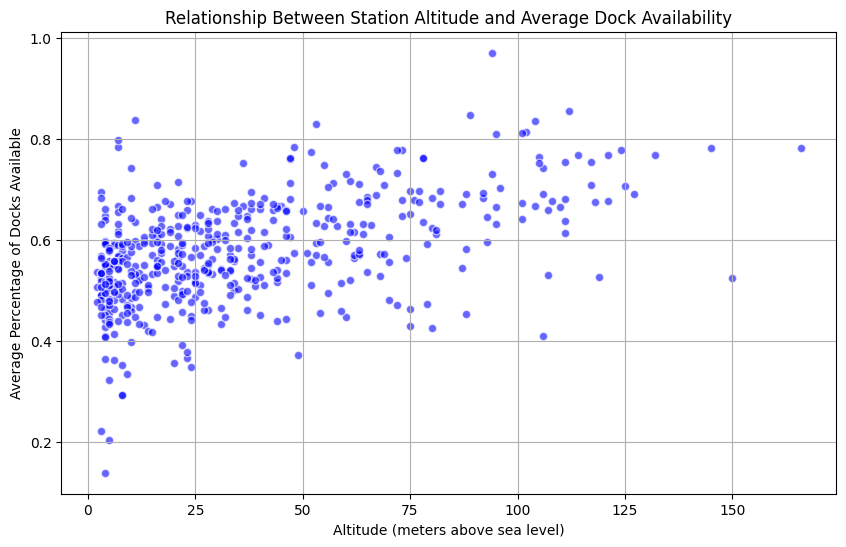

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'stations_final' es tu DataFrame y contiene las columnas 'percentage_docks_available' y 'altitude'

# Calcula la ocupación media de cada estación y la altitud media (si la altitud varía, aunque normalmente no debería)
station_means = stations_final.groupby('station_id').agg({
    'percentage_docks_available': 'mean',
    'altitude': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Crear un scatter plot
plt.scatter(station_means['altitude'], station_means['percentage_docks_available'], alpha=0.6, edgecolors='w', color='blue')

plt.xlabel('Altitude (meters above sea level)')  # Etiqueta del eje X
plt.ylabel('Average Percentage of Docks Available')  # Etiqueta del eje Y
plt.title('Relationship Between Station Altitude and Average Dock Availability')  # Título del gráfico

# Mostrar el gráfico
plt.grid(True)  # Añadir una cuadrícula para facilitar la lectura
plt.show()

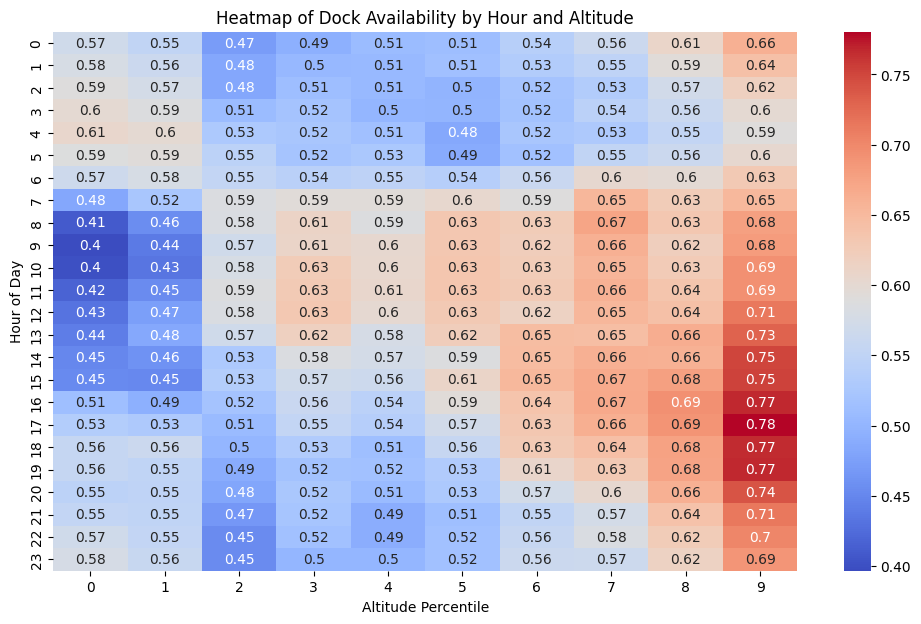

In [21]:

import seaborn as sns

# Assuming data is available for hours or days

heatmap_data = stations_final.pivot_table(values='percentage_docks_available', index='hour', columns='altitude_percentile', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True)
plt.xlabel('Altitude Percentile')
plt.ylabel('Hour of Day')
plt.title('Heatmap of Dock Availability by Hour and Altitude')
plt.show()